## Data Science Assignment 1



**Pallavi Prasad(19200662)**

**MSC Space Science and Technology**

**Task1 : Data Identification**

I have chosen the SpaceX.com open API  is "https://api.spacexdata.com/v2/launches" for analysis. It provides SpaceX rocket launches, core, success, failure and other details from 2006 to till date.
The API provides data in json format.
The details from the API can be used in various analysis to understand rocket launch performance and the insight gained can be utilized for further business and technical improvements


In [1]:
# Importing all the required libraries in the begining of the excercise.

import urllib.request
import json
import csv
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

**Task 2: Data Collection**

The data from selected API is collected in json and stored in txt and csv formats for further analysis.
Data Files created after collection in Data folder:
1. SpaceX_data_300320.txt : Contains all the raw data from the API in json form
2. SpaceX_data_300320.csv : Contains all the SpaceX rocket launch data
3. SpaceX_Failed_Launches_300320.csv : Contains all the failed records of rocket launches
4. SpaceX_Successful_Launches_300320.csv : Contains all the successful records of rocket launches


In [2]:
#Fetch details from the API
url = "https://api.spacexdata.com/v2/launches"
try:
    response = urllib.request.urlopen(url)
    contents = response.read().decode("utf-8")
except:
    print("failed to retrieve %s" % url)
print(contents)

[{"flight_number":1,"mission_name":"FalconSat","mission_id":[],"upcoming":false,"launch_year":"2006","launch_date_unix":1143239400,"launch_date_utc":"2006-03-24T22:30:00.000Z","launch_date_local":"2006-03-25T10:30:00+12:00","is_tentative":false,"tentative_max_precision":"hour","tbd":false,"launch_window":0,"rocket":{"rocket_id":"falcon1","rocket_name":"Falcon 1","rocket_type":"Merlin A","first_stage":{"cores":[{"core_serial":"Merlin1A","flight":1,"block":null,"gridfins":false,"legs":false,"reused":false,"land_success":null,"landing_intent":false,"landing_type":null,"landing_vehicle":null}]},"second_stage":{"block":1,"payloads":[{"payload_id":"FalconSAT-2","norad_id":[],"reused":false,"customers":["DARPA"],"nationality":"United States","manufacturer":"SSTL","payload_type":"Satellite","payload_mass_kg":20,"payload_mass_lbs":43,"orbit":"LEO","orbit_params":{"reference_system":"geocentric","regime":"low-earth","longitude":null,"semi_major_axis_km":null,"eccentricity":null,"periapsis_km":40

In [3]:
#Collect the data as received in json format and then save in a text file.
data = json.loads(contents)
print(data)
#Write the data in a txt file
with open('C:/Users/Pallavi/Python Workspace/SpaceX_data_300320.txt', 'w') as outfile:
    json.dump(data, outfile)


[{'flight_number': 1, 'mission_name': 'FalconSat', 'mission_id': [], 'upcoming': False, 'launch_year': '2006', 'launch_date_unix': 1143239400, 'launch_date_utc': '2006-03-24T22:30:00.000Z', 'launch_date_local': '2006-03-25T10:30:00+12:00', 'is_tentative': False, 'tentative_max_precision': 'hour', 'tbd': False, 'launch_window': 0, 'rocket': {'rocket_id': 'falcon1', 'rocket_name': 'Falcon 1', 'rocket_type': 'Merlin A', 'first_stage': {'cores': [{'core_serial': 'Merlin1A', 'flight': 1, 'block': None, 'gridfins': False, 'legs': False, 'reused': False, 'land_success': None, 'landing_intent': False, 'landing_type': None, 'landing_vehicle': None}]}, 'second_stage': {'block': 1, 'payloads': [{'payload_id': 'FalconSAT-2', 'norad_id': [], 'reused': False, 'customers': ['DARPA'], 'nationality': 'United States', 'manufacturer': 'SSTL', 'payload_type': 'Satellite', 'payload_mass_kg': 20, 'payload_mass_lbs': 43, 'orbit': 'LEO', 'orbit_params': {'reference_system': 'geocentric', 'regime': 'low-earth'

*Perform interim analysis of data and store the required data in csv format*

In [4]:
#Data Storage: Extract the required data from the parsed data in the above cell and write into CSV.
#Storing all relevant data in a csv file : "SpaceX_data_300320.csv"

d=pd.DataFrame() # Define an empty dataframe and insert all the required data into this dataframe
for items in data:
    #Fetching all the data from the API in a temp dataframe 
        tempDF=pd.DataFrame({'Flight_Number':[items['flight_number']],'Mission_Name':[items['mission_name']],
                             'Launch_Year': [items['launch_year']],'Launch_UTC': [items['launch_date_utc']],
                            'Rocket_Name': [items['rocket']['rocket_name']],
                            'Rocket_Type': [items['rocket']['rocket_type']],
                            'Launch_Site': [items['launch_site']['site_name_long']],
                            'Launch_Success': [items['launch_success']],'Remarks': [items['details']]})
        d = pd.concat([d,tempDF]) 
        
        
# Writing the data into a csv
d.to_csv('SpaceX_data_300320.csv', sep=',', encoding='utf-8',index=False)

In [5]:
#Reading all the data from csv file
df = pd.read_csv("SpaceX_data_300320.csv", header =0, index_col="Flight_Number")
df

,Mission_Name,Launch_Year,Launch_UTC,Rocket_Name,Rocket_Type,Launch_Site,Launch_Success,Remarks
Flight_Number,,,,,,,,
1,FalconSat,2006,2006-03-24T22:30:00.000Z,Falcon 1,Merlin A,Kwajalein Atoll Omelek Island,False,Engine failure at 33 seconds and loss of vehicle
2,DemoSat,2007,2007-03-21T01:10:00.000Z,Falcon 1,Merlin A,Kwajalein Atoll Omelek Island,False,Successful first stage burn and transition to ...
3,Trailblazer,2008,2008-08-02T03:34:00.000Z,Falcon 1,Merlin C,Kwajalein Atoll Omelek Island,False,Residual stage 1 thrust led to collision betwe...
4,RatSat,2008,2008-09-28T23:15:00.000Z,Falcon 1,Merlin C,Kwajalein Atoll Omelek Island,True,Ratsat was carried to orbit on the first succe...
5,RazakSat,2009,2009-07-13T03:35:00.000Z,Falcon 1,Merlin C,Kwajalein Atoll Omelek Island,True,NaN
6,Falcon 9 Test Flight,2010,2010-06-04T18:45:00.000Z,Falcon 9,v1.0,Cape Canaveral Air Force Station Space Launch ...,True,NaN
7,COTS 1,2010,2010-12-08T15:43:00.000Z,Falcon 9,v1.0,Cape Canaveral Air Force Station Space Launch ...,True,NaN
8,COTS 2,2012,2012-05-22T07:44:00.000Z,Falcon 9,v1.0,Cape Canaveral Air Force Station Space Launch ...,True,"Launch was scrubbed on first attempt, second l..."
9,CRS-1,2012,2012-10-08T00:35:00.000Z,Falcon 9,v1.0,Cape Canaveral Air Force Station Space Launch ...,True,"CRS-1 successful, but the secondary payload wa..."


In [6]:
# Collecting "failed" rocket launch data into separate csv

Failed_Launches = df.loc[df['Launch_Success'] == False] # Extracting failed rocket launches

Failed_Launches.to_csv("SpaceX_Failed_Launches_300320.csv",sep=',', encoding='utf-8',index="Flight_Number") # writing failed rocket launches into new csv

#Reading failed rocket launches
df_failed = pd.read_csv("SpaceX_Failed_Launches_300320.csv", header =0,index_col="Flight_Number")

df_failed

,Mission_Name,Launch_Year,Launch_UTC,Rocket_Name,Rocket_Type,Launch_Site,Launch_Success,Remarks
Flight_Number,,,,,,,,
1,FalconSat,2006,2006-03-24T22:30:00.000Z,Falcon 1,Merlin A,Kwajalein Atoll Omelek Island,False,Engine failure at 33 seconds and loss of vehicle
2,DemoSat,2007,2007-03-21T01:10:00.000Z,Falcon 1,Merlin A,Kwajalein Atoll Omelek Island,False,Successful first stage burn and transition to ...
3,Trailblazer,2008,2008-08-02T03:34:00.000Z,Falcon 1,Merlin C,Kwajalein Atoll Omelek Island,False,Residual stage 1 thrust led to collision betwe...
24,CRS-7,2015,2015-06-28T14:21:00.000Z,Falcon 9,v1.1,Cape Canaveral Air Force Station Space Launch ...,False,Launch performance was nominal until an overpr...
34,Amos-6,2016,2016-09-01T13:07:00.000Z,Falcon 9,FT,Cape Canaveral Air Force Station Space Launch ...,False,The rocket and Amos-6 payload were lost in a l...


In [7]:
# Collecting "successful" rocket launch data into separate csv

Successful_Launches = df.loc[df['Launch_Success'] == True] #Extracting successful rocket launches

Successful_Launches.to_csv("SpaceX_Successful_Launches_300320.csv",sep=',', encoding='utf-8',index="Flight_Number") # writing successful rocket launches into new csv

#Reading Successful rocket launches

df_success = pd.read_csv("SpaceX_Successful_Launches_300320.csv", header =0,index_col="Flight_Number")
df_success 

,Mission_Name,Launch_Year,Launch_UTC,Rocket_Name,Rocket_Type,Launch_Site,Launch_Success,Remarks
Flight_Number,,,,,,,,
4,RatSat,2008,2008-09-28T23:15:00.000Z,Falcon 1,Merlin C,Kwajalein Atoll Omelek Island,True,Ratsat was carried to orbit on the first succe...
5,RazakSat,2009,2009-07-13T03:35:00.000Z,Falcon 1,Merlin C,Kwajalein Atoll Omelek Island,True,NaN
6,Falcon 9 Test Flight,2010,2010-06-04T18:45:00.000Z,Falcon 9,v1.0,Cape Canaveral Air Force Station Space Launch ...,True,NaN
7,COTS 1,2010,2010-12-08T15:43:00.000Z,Falcon 9,v1.0,Cape Canaveral Air Force Station Space Launch ...,True,NaN
8,COTS 2,2012,2012-05-22T07:44:00.000Z,Falcon 9,v1.0,Cape Canaveral Air Force Station Space Launch ...,True,"Launch was scrubbed on first attempt, second l..."
9,CRS-1,2012,2012-10-08T00:35:00.000Z,Falcon 9,v1.0,Cape Canaveral Air Force Station Space Launch ...,True,"CRS-1 successful, but the secondary payload wa..."
10,CRS-2,2013,2013-03-01T19:10:00.000Z,Falcon 9,v1.0,Cape Canaveral Air Force Station Space Launch ...,True,Last launch of the original Falcon 9 v1.0 laun...
11,CASSIOPE,2013,2013-09-29T16:00:00.000Z,Falcon 9,v1.1,Vandenberg Air Force Base Space Launch Complex 4E,True,Commercial mission and first Falcon 9 v1.1 fli...
12,SES-8,2013,2013-12-03T22:41:00.000Z,Falcon 9,v1.1,Cape Canaveral Air Force Station Space Launch ...,True,First GTO launch for Falcon 9


**Task3: Data preparation and analysis**

In this section, all the data prechecks are done and type of analysis conducted are :
1) Which are the most common Rocket Launch sites?

2) What is the frequency of rocket launches done by SpaceX since 2006?

3) What is the success percentange of the rocket launches till now?

4) Which Rocket type has most succesfull records?

5) Which Rocket type has most failure records?

6) Which rocket category has most successful record and mostly used?

7) Which rocket category and rocket type combination has been most successful till date?

8) Which year had the highest rocket launches and which rocket contributed to most of the success?

In [8]:
df.isnull().sum() # Checking for Null values in the main df table , 
                  # It is the only the remarks column which has got NaN values which contains only string values
                  # The NaN values can not be normalized here as it is string and the column is only referred in canse required for further understanding.

Mission_Name      0
Launch_Year       0
Launch_UTC        0
Rocket_Name       0
Rocket_Type       0
Launch_Site       0
Launch_Success    0
Remarks           7
dtype: int64

In [9]:
df_failed.isnull().sum()  # Checking for Null values in the failed record table

Mission_Name      0
Launch_Year       0
Launch_UTC        0
Rocket_Name       0
Rocket_Type       0
Launch_Site       0
Launch_Success    0
Remarks           0
dtype: int64

In [10]:
df_success.isnull().sum() # Checking for Null values in the failed record table

Mission_Name      0
Launch_Year       0
Launch_UTC        0
Rocket_Name       0
Rocket_Type       0
Launch_Site       0
Launch_Success    0
Remarks           7
dtype: int64

*Analysis 1: Which are the most common Rocket Launch sites?*

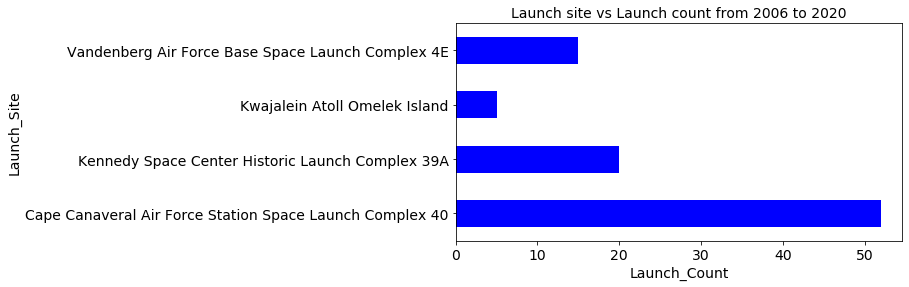

In [11]:
Launch_site_groups= df.groupby(["Launch_Site"]).count()  # Sort the data by grouping against "launch site" plot a bar graph of the same

# Plot a bar graph to visualize and find the launch site which is used for maximum number of times

bar_plot_launch_site = Launch_site_groups.iloc[:,1].plot(kind ="barh",figsize=(8, 4), fontsize=14, color="blue")
bar_plot_launch_site.set_xlabel("Launch_Count", fontsize=14)
bar_plot_launch_site.set_ylabel("Launch_Site", fontsize=14)
bar_plot_launch_site.set_title("Launch site vs Launch count from 2006 to 2020", fontsize=14);


*Analysis 2: What is the frequency of rocket launches done by SpaceX since 2006?*

Launch_Year
2006     1
2007     1
2008     2
2009     1
2010     2
2012     2
2013     3
2014     6
2015     7
2016     9
2017    18
2018    21
2019    13
2020     6
Name: Rocket_Name, dtype: int64


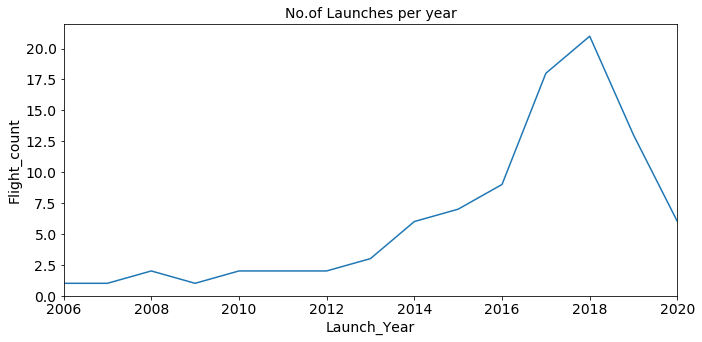

In [12]:
Launch_count = df.groupby(["Launch_Year"]).count() # Sort the data by grouping against launch year and plot the same to get the trend of the data

print(Launch_count.iloc[:,2]) # This will show the year wise count of rocket launches

# Plot a line graph of the lauch count will provide the trend of launches from 2006 to 2020

p = Launch_count.iloc[:,2].plot(kind ="line", figsize = (11,5), fontsize = 14)
p.set_xlabel("Launch_Year", fontsize=14)
p.set_ylabel("Flight_count", fontsize=14)
p.set_title("No.of Launches per year", fontsize=14);


*Analysis 3: What is the success percentange of the rocket launches till now?*

Number of successful and Failed Launches:
 True     87
False     5
Name: Launch_Success, dtype: int64


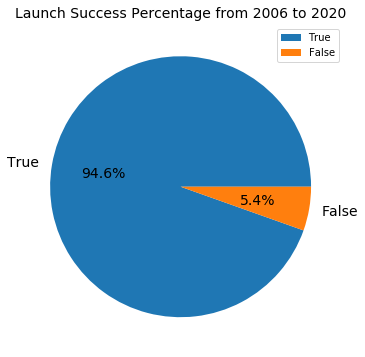

In [13]:
sucess_counts = df["Launch_Success"].value_counts()
print("Number of successful and Failed Launches:" '\n', sucess_counts)

# Plot a pie chart of success_count table to get the success % of the rocket launches till date
p = sucess_counts.plot(kind="pie", figsize=(6, 6), fontsize=14, autopct="%.1f%%")
p.set_ylabel(None)
p.set_title("Launch Success Percentage from 2006 to 2020", fontsize=14)
plt.legend(loc='best');

*Analysis 4:Which Rocket type has most succesfull records?*

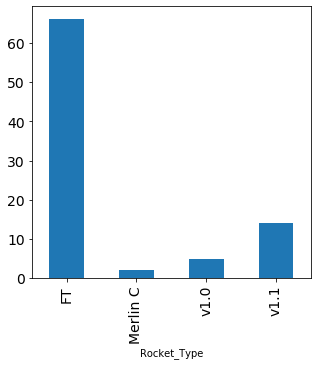

In [14]:
# Take a count of Rocket Type column from df_success table (which has only successful records) 
# Plot a bar graph of the same to visualize

df_rctype=df_success.groupby("Rocket_Type").count().iloc[:,1]
df_rctype.plot.bar(stacked=True,figsize=(5, 5), fontsize=14)


*Analysis 5: Which Rocket type has most failure records?*

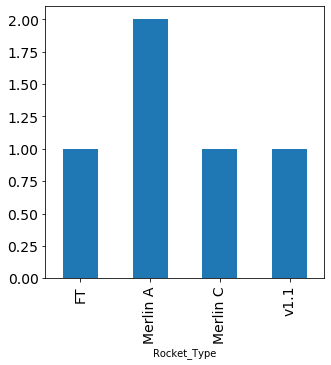

In [15]:
# Type of rocket which failed mostly
df_new=df_failed.groupby("Rocket_Type").count().iloc[:,1]
df_new.plot.bar(stacked=True,figsize=(5, 5), fontsize=14)


*Analysis 6 : Which rocket category has most successful record and mostly used?*

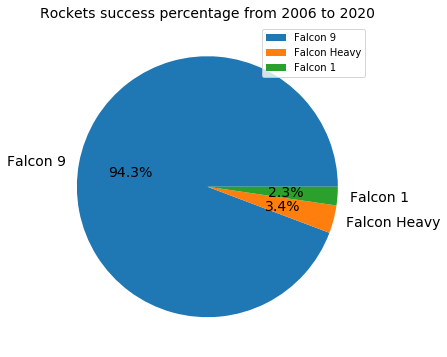

In [16]:
# Plot a pie graph for rocket name to understand the success% of the rockets

p = df_success['Rocket_Name'].value_counts().plot(kind="pie", figsize=(6, 6), fontsize=14, autopct="%.1f%%")
p.set_ylabel(None)
p.set_title("Rockets success percentage from 2006 to 2020", fontsize=14)
plt.legend(loc='best');



*Analysis 7 : Which rocket category and rocket type combination has been most successful till date?*

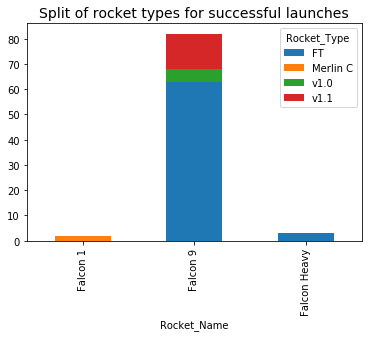

In [17]:
#Stacked bar chart showing the number of successful launches grouped by rocket category, split into  rocket types

df_success.groupby(['Rocket_Name','Rocket_Type']).size().unstack().plot(kind='bar',stacked=True)# reference from http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
plt.title("Split of rocket types for successful launches", fontsize=14)
plt.show()     

*Analysis 8: Which year had the highest rocket launches and which rocket contributed to most of the success?

Rocket Category Vs Success count
 Falcon 9        20
Falcon Heavy     1
Name: Rocket_Name, dtype: int64


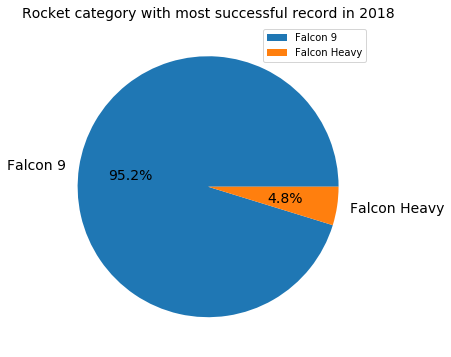

In [18]:
# From analysis 2 figure out which year had the maximum number of launches and extarct the data of that year

launches_2018 = df_success.loc[df_success['Launch_Year'] == 2018]    # extracting 2018 successful launches and saving in a different table
df_2018 = launches_2018["Rocket_Name"].value_counts()                
print("Rocket Category Vs Success count" '\n', df_2018)

# Plotting a pie graph to understand the success% of the rocket category
p = df_2018.plot(kind="pie", figsize=(6, 6), fontsize=14, autopct="%.1f%%")
p.set_ylabel(None)
p.set_title("Rocket category with most successful record in 2018", fontsize=14)
plt.legend(loc='best');


**Conclusion**

From the above analysis we have conluded that:
1) "Cape Canaveral Air Force Station Space Launch Complex 40" has been widely used for rocket launches;
2) Maximum number of rocket launches were done in the 2018 and the count was 21;
3) 94.6% is success rate of rocket launches since 2006 to till date;
4) "Rocket Type FT" has been the most successful one;
5) Rocket type "Merlin A" has a bad track record and failed 2 out of 5 failures;
6) "Falcon 9" rocket has 94.3% success record and has been used mostly;
7) "Falcon 9" rockets with rocket type "FT" has proven to be a successful combination for providing a successful launch;
8) 2018 had been the most successful year with 95.2% success record of "Falcon9" rocket

Above analysis shows that "FT" rocket model is combined with "Falcon9" rocket for launchces to get a success record.The analysis done so far provides a glimpse of SpaceX progress record and can be used for many business statistical analysis and reportings.
Another rocket models can be improved for lauches in different orbits and their failure rates can be reduced by further technical assessmemts and improvements. As of now "Falcon9" is helping the space industry to achive their science missions.
